In [66]:
#Movie Mood Matcher – A Data-Driven Recommender
!pip install seaborn

In [15]:
## Step 1: Import Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [16]:
## Step 2: Load Dataset (use your path or download from Kaggle)
# Sample Dataset: tmdb_5000_movies.csv
# download from: https://www.kaggle.com/datasets/tmdb/tmdb-movie-metadata

In [17]:
df = pd.read_csv("https://raw.githubusercontent.com/sandesh711/Movie_Mood_Matcher/refs/heads/main/tmdb_5000_movies.csv")
df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [50]:
## Step 3: Basic Cleanup
# Focus on useful columns only
df = df[['title', 'vote_average', 'vote_count', 'genres', 'overview']]
df.dropna(inplace=True)
#print(df["genres"][0])

In [31]:
## Step 4: Define Mood → Genre Mapping
mood_map = {
    "happy": ["Comedy", "Adventure"],
    "sad": ["Family", "Drama"],
    "bored": ["Action", "Thriller"],
    "romantic": ["Romance", "Drama"],
    "angry": ["Action", "Crime"],
    "excited": ["Science Fiction", "Adventure"],
    "calm": ["Documentary", "History"]
}

In [32]:
# Step 5: Ask for User Input
user_mood = input("How are you feeling today? (happy, sad, bored, romantic, angry, excited, calm): ").lower()
genres = mood_map.get(user_mood, ["Drama"])
print(f"Searching movies for mood '{user_mood}' with genres: {genres}")

How are you feeling today? (happy, sad, bored, romantic, angry, excited, calm):  bored


Searching movies for mood 'bored' with genres: ['Action', 'Thriller']


In [52]:
#Filter by Genre and Rank by Rating
# Handle genre column (convert JSON-like strings)
import ast
def extract_genres(genre_str):
    #print("genre_str:",genre_str)
    #print(type(genre_str))
    try:
        genre_list = ast.literal_eval(genre_str)
        #print(type(genre_list))
        #print("genre_list:",genre_list)
        return [g['name'] for g in genre_list]
    except:
        return []

In [53]:
df['genre_list'] = df['genres'].apply(extract_genres)
#df.head()

In [61]:
df_exploded = df.explode('genre_list').reset_index(drop=True)
# print(df_exploded.head(8))

In [63]:
filtered = df_exploded[df_exploded['genre_list'].isin(genres)]
# filtered.head()

In [64]:
top_movies = filtered.sort_values(by=['vote_average', 'vote_count'], ascending=False)
#top_movies.head()


Top Movie Suggestions for You:
                                               title  vote_average genre_list
6705                                  One Man's Hero           9.3     Action
8772                                    Pulp Fiction           8.3   Thriller
201                                  The Dark Knight           8.2     Action
203                                  The Dark Knight           8.2   Thriller
5678                         The Empire Strikes Back           8.2     Action
6152                                          Psycho           8.2   Thriller
11667                                  Seven Samurai           8.2     Action
314                                        Inception           8.1     Action
315                                        Inception           8.1   Thriller
1074   The Lord of the Rings: The Return of the King           8.1     Action


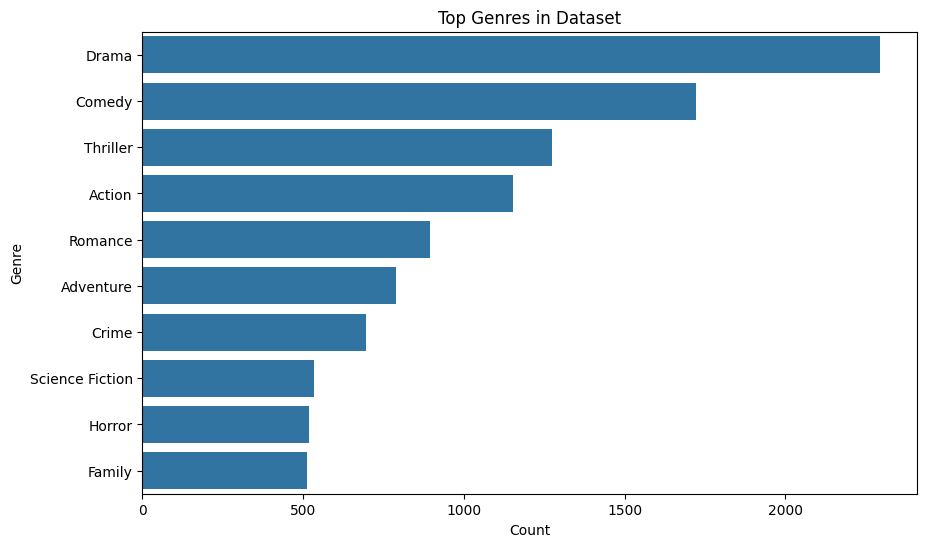

In [65]:
# Show Top 10 Suggestions
print("\nTop Movie Suggestions for You:")
print(top_movies[['title', 'vote_average', 'genre_list']].head(10))
# Visualize Genre Distribution (Optional)
plt.figure(figsize=(10,6))
sns.countplot(y='genre_list', data=df_exploded, order=df_exploded['genre_list'].value_counts().index[:10])
plt.title("Top Genres in Dataset")
plt.xlabel("Count")
plt.ylabel("Genre")
plt.show()